In [2]:
# remember to load the environment first by running `conda activate colombia_analysis`
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from datetime import datetime

from matplotlib import font_manager as fm
fm.findfont('Helvetica Neue')

#designate which font to use. To use others just use different ttf files 
#if ttf files not already in there, may need to do fondu conversion of dfont files and move in.
font_path = '/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/HelveticaNeue.ttf'
font_properties = fm.FontProperties(fname=font_path)
print (font_properties)
mpl.rcParams['font.family'] = font_properties.get_name()

#designate some font characteristics
mpl.rcParams['font.weight']=100
mpl.rcParams['axes.labelweight']=100
mpl.rcParams['font.size']=14

:family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/HelveticaNeue.ttf:size=10.0


/Users/alliblk/miniconda3/envs/colombia_analysis/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


# Plotting map figures

There are two map figures that are included in the paper. One that shows sampling locations of genomes that we ourselves sequenced as part of this study, and a second figure in the supplement that shows at the department-level where all Colombian sequences in our analysis (including those sequenced by other groups) were sampled.

In [2]:
#These lat and longs were looked up online, the cities that samples came from are known from the surveillance data.
city_lat_long_dict = {
    'cali':{'latitude': 3.395397, 'longitude': -76.6657535},
    'monteria':{'latitude': 8.7606317, 'longitude': -75.9169898},
    'ibague':{'latitude': 4.4788663, 'longitude': -75.5238119},
    'belen_de_umbria':{'latitude': 5.2009136, 'longitude': -75.873638},
    'pitalito':{'latitude': 1.8530233, 'longitude': -76.0724286},
                     }

In [3]:
# turn the lats and longs into simple lists for matplotlib plotting
lats = [city_lat_long_dict[key]['latitude'] for key in city_lat_long_dict.keys()]
longs = [city_lat_long_dict[key]['longitude'] for key in city_lat_long_dict.keys()]
print lats
print longs

[3.395397, 1.8530233, 8.7606317, 5.2009136, 4.4788663]
[-76.6657535, -76.0724286, -75.9169898, -75.873638, -75.5238119]


/Users/alliblk/miniconda3/envs/colombia-python2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1709: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/alliblk/miniconda3/envs/colombia-python2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


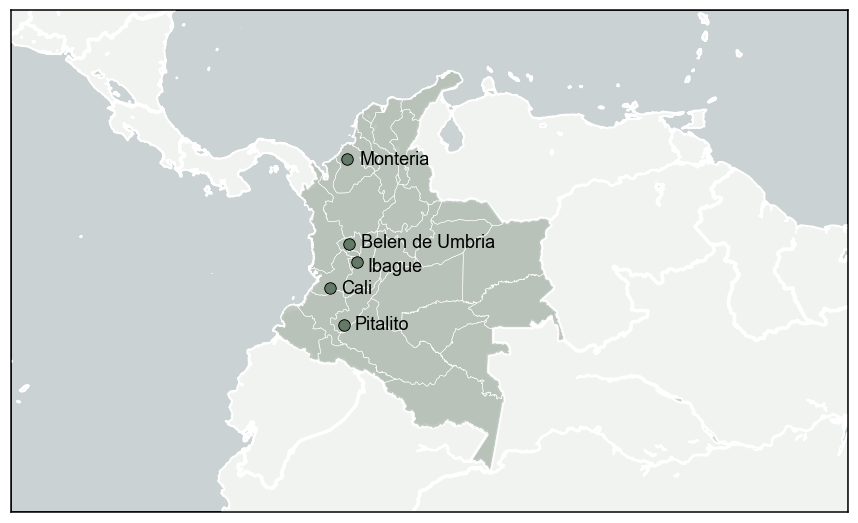

In [4]:
#map plotting time
fig,ax1 = plt.subplots(figsize=(15, 10),facecolor='w')

# bound the portion of the earth that I want to look at with lats and longs for lower left corner and upper right corner
# use low resolution ('l') when scripting so doesn't take a million years to plot. Turn it up higher for manuscript quality fig
# set ax for point scatter.
colombia_map = Basemap(llcrnrlat=-6,urcrnrlat=15,llcrnrlon=-90,urcrnrlon=-55,resolution='h', ax=ax1)
colombia_map.drawmapboundary(fill_color='#CAD2D4', linewidth=1.5) #fill in the ocean, and add box around the map figure
colombia_map.drawcoastlines(color='white', linewidth=2) #draw the coastlines
colombia_map.drawcountries(color='#FFFFFF',linewidth=3.5, linestyle='solid') #draw the country borders
colombia_map.fillcontinents(color ='#F1F3F0') #fill in the landmass color

# make a polygon path for Colombia as a whole so it can be colored differently (0 in shape files references administrative level 0 , or country boundaries)
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_0','country',drawbounds=False)#read in Colombian departmental boundaries from shapefiles
patches = [Polygon(np.array(shape)) for shape in colombia_map.country]  
ax1.add_collection(PatchCollection(patches, facecolor= '#637a66', edgecolor='white', linewidths=1., zorder=2, alpha=0.4))

# add the departmental boundaries, 1 in shapefile references administrative level 1.
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_1','departments',color='#FFFFFF', linewidth=0.5)#read in Colombian departmental boundaries from shapefiles

#add sampling locations to the map given lats and longs of the cities coded above
ax1.scatter(x=longs, y=lats, c='black', alpha=1, zorder=9, marker='o',s=130)
ax1.scatter(x=longs, y=lats, c='#637a66', alpha=1, zorder=10, marker='o',s=90)

### Add CITY LABELING
plt.text(-75.41, 8.74798, 'Monteria', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.35, 5.3,'Belen de Umbria', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.1, 4.3,  'Ibague', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-76.2, 3.35, 'Cali', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.6, 1.85, 'Pitalito', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')


plt.savefig('../manuscript/figures/genome-locations-figure1.png', dpi=300)
plt.savefig('../manuscript/figures/genome-locations-figure1.pdf', dpi=300)



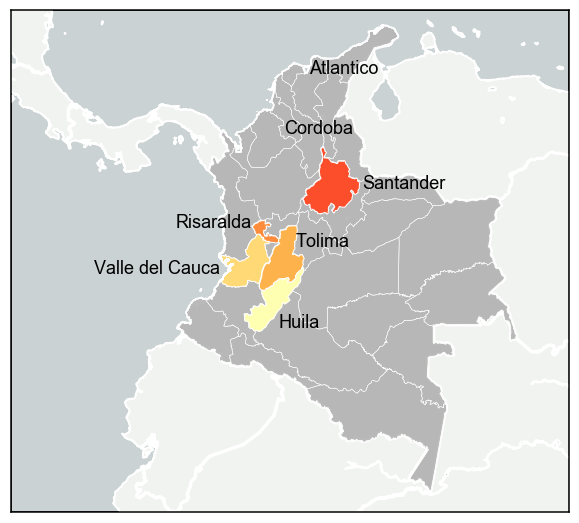

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import numpy as np

# plot colombian map with departments that have genome samples colored and all other greyed out
#map plotting time
fig,ax1 = plt.subplots(figsize=(10, 10),facecolor='w')

# bound the portion of the earth that I want to look at with lats and longs for lower left corner and upper right corner
# use low resolution ('l') when scripting so doesn't take a million years to plot. Turn it up higher for manuscript quality fig
# set ax for point scatter.
colombia_map = Basemap(llcrnrlat=-5,urcrnrlat=13,llcrnrlon=-85,urcrnrlon=-65,resolution='h', ax=ax1)
colombia_map.drawmapboundary(fill_color='#CAD2D4', linewidth=1.5) #fill in the ocean, and add box around the map figure
colombia_map.drawcoastlines(color='white', linewidth=2) #draw the coastlines
colombia_map.drawcountries(color='#FFFFFF',linewidth=3.5, linestyle='solid') #draw the country borders
colombia_map.fillcontinents(color ='#F1F3F0') #fill in the landmass color

# make a polygon path for Colombia as a whole so it can be colored differently (0 in shape files references administrative level 0 , or country boundaries)
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_0','country',drawbounds=False)#read in Colombian departmental boundaries from shapefiles
patches = [Polygon(np.array(shape)) for shape in colombia_map.country]
ax1.add_collection(PatchCollection(patches, facecolor= 'darkgrey', edgecolor='white', linewidths=1., zorder=2, alpha=0.8))
# add the departmental boundaries, 1 in shapefile references administrative level 1.
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_1','departments',color='#FFFFFF', linewidth=0.5)#read in Colombian departmental boundaries from shapefiles

#patch_names = [(colombia_map.departments_info[i]['NAME_1']) for i in range(len(colombia_map.departments_info))]
#print [name for name in patch_names if name.startswith('C')]
#make list of departments that have genomic sampling with name formatted as it is in the shape file
#note some of the UTF issues, e.g. with how Atlantico and Cordoba end up getting spelled.
departments_with_genomic_sampling = ['Tolima', 'Valle del Cauca', 'Huila', 'Santander', 
                                 'Atl\xc3\xa1ntico','Risaralda','C\xc3\xb3rdoba' ]

def color_single_patch(patch_name):
    '''this function returns a polygon patch object for a specified department.
    note that the string name given to this function needs to match the string
    name that is given in the shapefile.'''
    patch_to_color = []
    for info, shape in zip(colombia_map.departments_info,colombia_map.departments):
        if info['NAME_1'] == patch_name:
            patch_to_color.append(Polygon(np.array(shape), True))
    return patch_to_color

patch_dict= {}
for department in departments_with_genomic_sampling:
     patch_dict[department]= color_single_patch(department)
#print patch_dict.keys()
        
ax1.add_collection(PatchCollection(patch_dict['Atl\xc3\xa1ntico'], facecolor= '#b10026', edgecolor='white', linewidths=1, zorder=2))
plt.text(-74.3, 10.9, 'Atlantico', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

ax1.add_collection(PatchCollection(patch_dict['C\xc3\xb3rdoba'], facecolor= '#e31a1c', edgecolor='white', linewidths=1, zorder=2))
plt.text(-75.2, 8.74798, 'Cordoba', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

ax1.add_collection(PatchCollection(patch_dict['Santander'], facecolor= '#fc4e2a', edgecolor='white', linewidths=1, zorder=2))
plt.text(-72.4, 6.8,'Santander', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

ax1.add_collection(PatchCollection(patch_dict['Risaralda'], facecolor= '#fd8d3c', edgecolor='white', linewidths=1, zorder=2))
plt.text(-79.1, 5.4,'Risaralda', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

ax1.add_collection(PatchCollection(patch_dict['Tolima'], facecolor= '#feb24c', edgecolor='white', linewidths=1, zorder=2))
plt.text(-74.8, 4.7,  'Tolima', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

ax1.add_collection(PatchCollection(patch_dict['Valle del Cauca'], facecolor= '#fed976', edgecolor='white', linewidths=1, zorder=2))
plt.text(-82.0, 3.75, 'Valle del Cauca', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

ax1.add_collection(PatchCollection(patch_dict['Huila'], facecolor= '#ffffb2', edgecolor='white', linewidths=1, zorder=2))
plt.text(-75.4, 1.8, 'Huila', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')

plt.savefig('../supplemental-analysis/department-level-analysis/departments-map.png', dpi=300)

# Plotting case counts and genomic sampling

An additional figure in the paper shows the incidence of Zika in Colombia, as well as the genomic sampling intensity over time. Importantly, not all Colombian sequences had sampling dates - some of them were inferred in our analysis. I'm pulling inferred sampling dates from nextstrain-jsons and coloring them differently from samples where the sample collection date is known.

In [5]:
from datetime import datetime as dt
from datetime import timedelta

def decimalDateToNextstrainDate(decimalDate):
    """ Converts decimal dates to a string in YYYY-MM-DD format, to match nextstrain date output 
    This works by turning the decimal part into a total number of seconds, and converting that number 
    of seconds into a month and day combination."""
    
    year = int(decimalDate)
    remainder = decimalDate-year
    dt_format_year = datetime(year,1,1)
    full_date = dt_format_year + timedelta(seconds=(dt_format_year.replace(year=dt_format_year.year + 1) - dt_format_year).total_seconds() * remainder)
    yyyymmdd = full_date.strftime('%Y-%m-%d')
    return yyyymmdd

In [5]:
# get epi data in and formatted correctly.
epi_daily_data = pd.read_csv("../data/zika-surveillance-data.csv")
epi_daily_data['datetime_date'] =pd.to_datetime(epi_daily_data['date_onset'])

In [6]:
epi_weekly_counts= epi_daily_data.groupby(pd.Grouper(key='datetime_date',freq='W')).count()
epi_weekly_counts.to_csv('../data/weekly_counts.csv')
# just printing out to csv, renaming headers because trying to convert timestamp and index stuff is such a headache
# What I did: rename the date column, and delete the excess columns (counts were the same and recorded in all columns)

In [8]:
good_weekly_counts = pd.read_csv('../data/zika-surveillance-weekly-counts.csv')

In [11]:
# Add in JSON Parsing for sampling dates to add to the epi curve
#note to self: don't worry about unicode string identifying u's in front of key names.
import json
with open('../results/branch_lengths.json') as json_file:    
    date_info = json.load(json_file)

colombian_strains = [key for key in date_info['nodes'].keys() if key.startswith('COL') or key.startswith('Colombia') or key == 'Aedes_aegypti/COL/FH04/2016']
assert len(colombian_strains) == 20, 'missing a strain somewhere, check whether key critieria matches all possible Colombian naming conventions.'

In [12]:
known_sampling_dates = {}
inferred_sampling_dates = {}

for strain in date_info['nodes'].keys():
    if strain in colombian_strains:
        if date_info['nodes'][strain]['raw_date'].endswith('XX'): #these are dates that were inferred
            inferred_sampling_dates[strain] = decimalDateToNextstrainDate(date_info['nodes'][strain]['numdate'])
        else:
            known_sampling_dates[strain] = date_info['nodes'][strain]['raw_date']

(735743.09999999998, 736741.90000000002)
(735743.09999999998, 736741.90000000002)


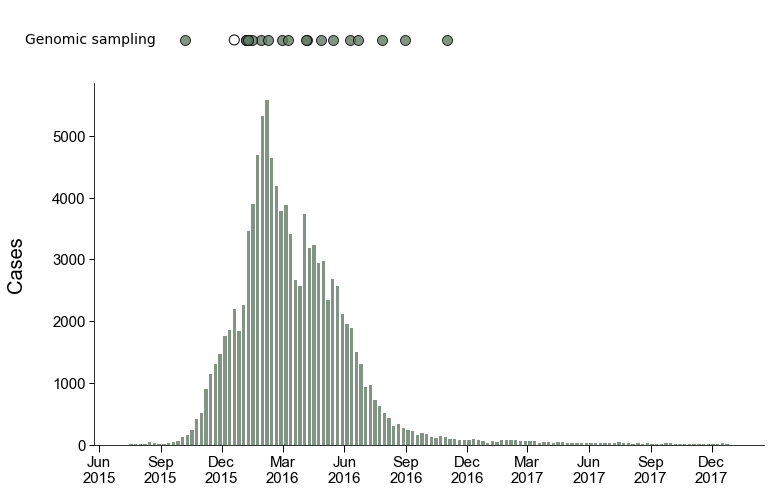

In [13]:
from matplotlib.dates import DateFormatter, DayLocator, YearLocator
from matplotlib import gridspec
from numpy import random
random.seed(1234678)

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5], wspace=0, hspace=0 )

fig,ax = plt.subplots(figsize=(12, 8),facecolor='w')

ax = plt.subplot(gs[1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

dates = [datetime.strptime(x,'%Y-%m-%d') for x in good_weekly_counts['start_of_week']]
cases = good_weekly_counts['case_count']
plt.bar(dates, cases, align='center', width = 5, alpha=0.8, color='#637a66')

ax.xaxis_date()
weekFormatter = DateFormatter('%b\n%Y')              
ax.xaxis.set_major_formatter(weekFormatter)

ax.set_ylabel('Cases\n',size=20, fontname='Arial')
ax.set_title('Epidemic curve of weekly reported Zika cases in Colombia', size=24, fontname='Arial')
print (ax.get_xlim())

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=15, width=1, size=7)
ax.tick_params(axis='y',labelsize=15, width=1, size=5)

for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
    
    
    
### Genome sampling dates

ax2 = plt.subplot(gs[0])

ax2.set_xlim(735743.09999999998, 736741.90000000002)
ax2.xaxis_date()
ax2.set_ylim(0,1)


plottable_inferred_dates = [datetime.strptime(x,'%Y-%m-%d') for x in inferred_sampling_dates.values()]
for date in plottable_inferred_dates:
    ax2.scatter(date,0.59,s=100,marker='o',facecolor='none', alpha=1,edgecolor='black',zorder=99)

#random.uniform(0.3,0.7)
plottable_known_dates = [datetime.strptime(x,'%Y-%m-%d') for x in known_sampling_dates.values()]
for date in plottable_known_dates:
    ax2.scatter(date,0.59,s=100,marker='o',facecolor='#637a66', alpha=0.8,edgecolor='black',zorder=99)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.set_ylabel('Genomic sampling', rotation = 360, size=14)
ax2.set_xticks([])
ax2.set_yticks([])
print(ax2.get_xlim())

plt.savefig('../manuscript/figures/epi-curve-with-genomic-sampling.png')
plt.savefig('../manuscript/figures/epi-curve-with-genomic-sampling.pdf')